# Examen Final Macroecomía Dinámica 
## Ejercitación Numérica

### Profesor : Damian Pierri, Tutor: Nicolas Tanzi

### Alumnos: Francisco Guerrero,Juan Pedregal

### 15 de septiembre de 2021.

##### El ejercicio requiere hallar la trayectoria de las decisiones de inversion, consumo, capital y producto para una serie de parámetros que representan a los parámetros de una economía pequeña y abierta

### Indice 

#### 1.-Importacion de librerías.
#### 2.-Definición de la funcion a maximizar.
#### 3.-Inicializacion de parámetros.
#### 4.-Definición de operadores de Bellman.
#### 5.-Búsqueda  de la función de Valor  y la policy function utilizando Value Function Iteration tanto para $ I \geq 0 $ o  $I \in [-\infty , \infty] $
#### 6.-Gráfico de las respuestas tanto para consumo $c_t$, stock de capital $k_t$, producto $y_t$

In [1]:
#Espacio dejado intencionalmente en blanco

#### 1.- Importacion de librerías, importo las librerías (instaladas previamente mediante Pkg) necesarias para desarrollar el programa se tiene aqui :

->Plots: Sirve para hacer los distintos gráficos, librería de complicada instalación.\
->Optim: Sirve para hallar el maximo de la funcion de valor y el argmax de este.\
->Interpolations:Usado para generar una funcion lineal de la funcion de Valor con respecto al capital.\
->LinearAlgebra: Para hacer operaciones de álgebra lineal.

In [2]:
### Usar este comando si y solo si  este archivo se pone en una carpeta difernete donde se tienen los files de Julia 
### sirve para generar archivos de registro y demás, es posible que de error si no se hace esto
### (Para proceder descomentar los siguientes comandos)

### using Pkg
### Pkg.add("Plots")
### Pkg.update()

In [3]:
using Plots; using Optim; using Interpolations; using LinearAlgebra;


________________________________________________________________________________________________________________________

#### 2.-Definicion de la función a maximizar

#####  El problema que tenemos consiste en maximizar la siguiente función de valor :

$$
V(K_t) = \max_{0 \leq c_t \leq K_{t+1}}
    \left\{
        u(c_t) + \beta \; V(K_{t+1})
    \right\}
$$

Donde tenemos que el valor de $c_t$ es igual a 

$$
c_t = f(K_t) + (1-\delta)\,K_t - K_{t+1}
$$

Reemplazando tenemos que 

$$
V(K_t) = \max_{(1-\delta)\,K_t \leq K_{t+1} \leq f(K_{t})}
    \left\{
        u(f(K_t)+ (1-\delta)\,K_t - K_{t+1}) + \beta \, V(K_{t+1})
    \right\}
$$

Para una mejor notación reemplazo $K_t$ por K y $K_{t+1}$ por K'
$$
V(K) = \max_{(1-\delta)\,K \leq K' \leq f(K)}
    \left\{
        u(f(K)+ (1-\delta)\,K - K') + \beta \, V(K')
    \right\}
$$


Es importante el límite inferior, el cual indica que la restriccion de inversion es positiva

Ciertos puntos a tener en cuenta para el desarrollo 

    Funcion de produccion
    
        La funcion de produccion ,la utilidad y el capital  y el consumo deben cumplir las sgts conds.
        
1. $f(0)=0$ 
2. $f$ is diferenciable dos veces
3. $f'(K)>0\quad\forall K$ Estrictamente creciente en el capital
4. $f''(K)\leq0$ La función es concava
5. $u$ La funcion de utilidad es cóncava
6. $u'(c)>0\quad\forall c$ Estrictamente creciente
7. $u''(c)<0\quad\forall c$ Estrictamente concava
8. $c_t \geq 0\quad\forall t$
8. $K_t \geq 0\quad\forall t>0$
9. $K_0$ dado
10. $U_t < \infty$ Condicion de transversalidad, la utililidad está acotada

Para este caso tenemos la funcion de produccion(Notese que internalize el capital depreciado dentro de la funcion de producción, para más detalles dirigirse al documento que plantea el ejercicio)

$$
f(K) = A\,K^{\alpha} +(1-\delta)\,K
$$

La funcion de utilidad es 

$$
u(c) = \frac{c^{1-\gamma} -1}{\gamma -1}
$$

Estas son respectivamente una Cobb-Douglas y una CRRA, ambas crecientes, cóncavas y continuamente diferenciables.



________________________________________________________________________________________________________________________

#### 3.- Inicializacion de Parámetros.
En esta sección inicializo los valores iniciales para la función, para hacer VFI considero como funcion inicial a una funcion candidata $V_0(k)$ que simboliza el valor esperado considerando el estado estacionario de capital, entrando al operador de bellman tengo que esta función es :

$$
V_0(k) = u(f(k)-k)/(1-β)
$$

El problema sigue como tal, se establecen los parámetros, se determina tanto la función de utilidad, y se estable una grilla con el valor de estado estacionario de K, dados los parámetros.

In [4]:
#Asignacion de parámetros,declaración de funciones
γ = 2
A = 1
α = 0.27 
𝛿 = 0.005
u(c) = γ==1.0 ?  log(c)  :  (c^(1-γ) -1 )/(1-γ)   # CRRA
f(k)=A*k^α+(1-𝛿)*k # Cobb-Douglas con depreciación

#Condicion inicial
K_0 = 80 
β = 0.98

V_0(k) = u(f(k)-k)/(1-β)

#Definicion de limites de K

@show Kmax = (A/𝛿)^(1/(1-α)) 
@show Kg = Optim.maximizer( maximize(V_0, 1e-5, max(K_0,Kmax)) ) 
@show Kss = ((β*A*α)/(1-β*(1-𝛿)))^(1/(1-α))


n=500 # Puntos de la grilla
which_k = 1 # 1: Kss   2: Kg   3: Kmax    

if which_k==1
    K_grid =    Kss>=K_0 ?    range(K_0, Kss, length=n)  :  range(Kss, K_0, length=n)
elseif which_k==2
    K_grid = range(1e-10, max(K_0,Kg), length=n)
else
    K_grid = range(1e-10, max(K_0,Kmax), length=n)
end


Kmax = (A / 𝛿) ^ (1 / (1 - α)) = 1419.3708588538068
Kg = Optim.maximizer(maximize(V_0, 1.0e-5, max(K_0, Kmax))) = 236.12508506300765
Kss = ((β * A * α) / (1 - β * (1 - 𝛿))) ^ (1 / (1 - α)) = 25.469145452100552


25.469145452100552:0.10928026963506904:80.0

________________________________________________________________________________________________________________________

#### 4.- Definición de los operadores de Bellman
Ahora se definen 2 operadores de Bellman, el primero impondra la restricción de un capital mínimo para  cada iteración (Esto para satisfacer la restricción de no negatividad de la inversión), mientras el segundo operador podra elegir cualquier K para maximizar siempre y cuando K sea mayor que 0

In [5]:
#### Primer Oeperador de Bellman (Con restricción a la inversion)

function T(V, K_grid)
    V_fun = LinearInterpolation(K_grid, V, extrapolation_bc = Line()) # linear interpolation of the vectorized (or not) function
    
    objectives = (K -> u.((f(k)-K)) + β * V_fun(K)  for k in K_grid)
    K_min = K_grid[1]
    #results = maximize.(objectives, K_min,f.(K_grid)) 
    results = maximize.(objectives, K_min,f.(K_grid)) 
    V_new = Optim.maximum.(results)
    g_new = Optim.maximizer.(results)

    return V_new, g_new
end


T (generic function with 1 method)

In [6]:
##  Segundo operador de Bellman (Sin restricción a la inversión)

function T_2(V, K_grid)
    V_fun = LinearInterpolation(K_grid, V, extrapolation_bc = Line()) # linear interpolation of the vectorized (or not) function
    
    objectives = (K -> u.((f(k)-K)) + β * V_fun(K)  for k in K_grid)
    
    results = maximize.(objectives, 1e-10,f.(K_grid)) 

    V_new = Optim.maximum.(results)
    g_new = Optim.maximizer.(results)

    return V_new, g_new
end




T_2 (generic function with 1 method)

________________________________________________________________________________________________________________________

#### 5.-Búsqueda  de la función de Valor  y la policy function utilizando Value Function Iteration tanto para $ I \geq 0 $ o  $I \in [-\infty , \infty] $

Ahora se aplicara 2 value function iteration para cada uno de los 2 casos descritos. 

#### Value Function Iteration- Con Restriccion a la inversión 

Numero de iteraciones: 444
Distancia entre las dos últimas funciones de valor: 9.831762985176121e-11


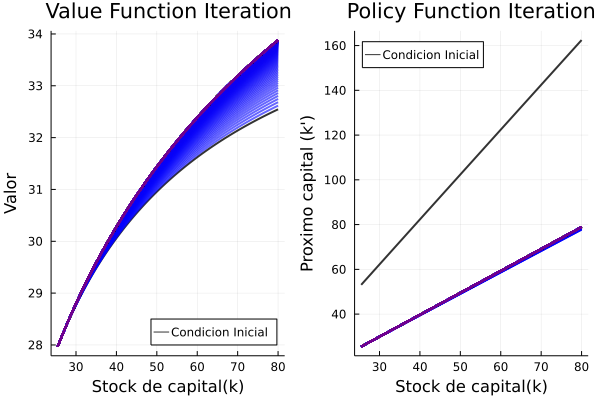

In [7]:

V1=V_0.(K_grid) # Forma discreta de V
g1=f.(K_grid)+(1-𝛿)*(K_grid) # Policiy Function Inicial

pltV1=plot(K_grid, V1, color = :black, linewidth = 2, alpha = 0.8, label = "Condicion Inicial ")
pltg1=plot(K_grid, g1, color = :black, linewidth = 2, alpha = 0.8, label = "Condicion Inicial")

max_iter = 1000  
tol = 1e-10 # Nivel de tolerancia
distance=tol+1 # Distancia incial
i=1
while i < max_iter && distance > tol
    global V_new1, g_new1= T(V1, K_grid)
    plot!(pltV1,K_grid, V_new1, color = RGBA(i/max_iter, 0, 1 - i/max_iter, 0.8), linewidth = 2, alpha = 0.6, label = "")
    plot!(pltg1,K_grid, g_new1, color = RGBA(i/max_iter, 0, 1 - i/max_iter, 0.8), linewidth = 2, alpha = 0.6, label = "")
    distance = norm(V_new1 - V1)
    i += 1
    V1 = V_new1 
end
g_1=LinearInterpolation(K_grid, g_new1, extrapolation_bc = Line()) 

println("Numero de iteraciones: ",i,"\nDistancia entre las dos últimas funciones de valor: ",distance)

plot!(pltV1, legend = :bottomright,xlabel = "Stock de capital(k)",ylabel="Valor", title="Value Function Iteration")
plot!(pltg1, legend = :topleft,xlabel = "Stock de capital(k)", ylabel="Proximo capital (k')",title="Policy Function Iteration")

plot(pltV1, pltg1,fmt=:png)

#Se permite la representacion grafica con formato png, disminuye ligeramente la calidad 
#del gráfico pero evita que se ralentize la computadora, para usarla comentar la linea
#de código de arriba y descomentar la linea que sigue a este párrafo

#plot(pltV1, pltg1,fmt=:png)



#### Value Function Iteration - Sin restriccion a la inversion

Numero de iteraciones: 1000
Distancia entre las dos últimas funciones de valor: 5.286923812937567e-5


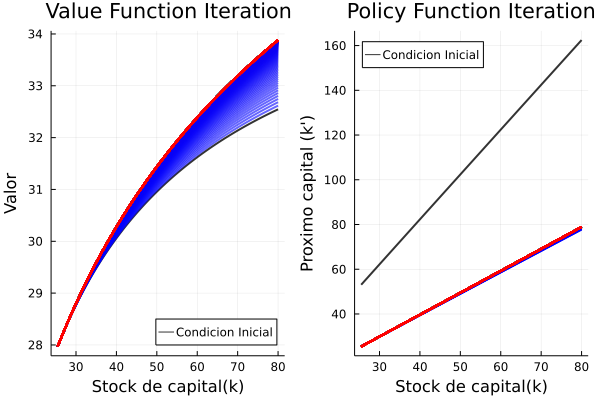

In [8]:
V=V_0.(K_grid) # dicretized form of V_0
g=f.(K_grid)+(1-𝛿)*(K_grid) # initial polcy function consisten with V_0

pltV2=plot(K_grid, V, color = :black, linewidth = 2, alpha = 0.8, label = "Condicion Inicial")
pltg2=plot(K_grid, g, color = :black, linewidth = 2, alpha = 0.8, label = "Condicion Inicial")

max_iter = 1000   
tol = 1e-10 # 
distance=tol+1 # 
i=1
while i < max_iter && distance > tol
    global V_new, g_new = T_2(V, K_grid)
    plot!(pltV2,K_grid, V_new, color = RGBA(i/max_iter, 0, 1 - i/max_iter, 0.8), linewidth = 2, alpha = 0.6, label = "")
    plot!(pltg2,K_grid, g_new, color = RGBA(i/max_iter, 0, 1 - i/max_iter, 0.8), linewidth = 2, alpha = 0.6, label = "")
    distance = norm(V_new - V)
    i += 1
    V = V_new  #
end
g_2=LinearInterpolation(K_grid, g_new, extrapolation_bc = Line()) # policy function K_t => K_t+1

println("Numero de iteraciones: ",i,"\nDistancia entre las dos últimas funciones de valor: ",distance)

plot!(pltV2, legend = :bottomright,xlabel = "Stock de capital(k)",ylabel="Valor", title="Value Function Iteration")
plot!(pltg2, legend = :topleft,xlabel = "Stock de capital(k)", ylabel="Proximo capital (k')",title="Policy Function Iteration")

plot(pltV2, pltg2)

#Se permite la representacion grafica con formato png, disminuye ligeramente la calidad 
#del gráfico pero evita que se ralentize la computadora, para usarla comentar la linea
#de código de arriba y descomentar la linea que sigue a este párrafo

#plot(pltV2, pltg2,fmt=:png)

________________________________________________________________________________________________________________________

#### 6.-Gráfico de las respuestas tanto para consumo $c_t$, stock de capital $k_t$, producto $y_t$

#### Grafico del consumo para un $K_0$ = 80 , y con restriccion de inversión


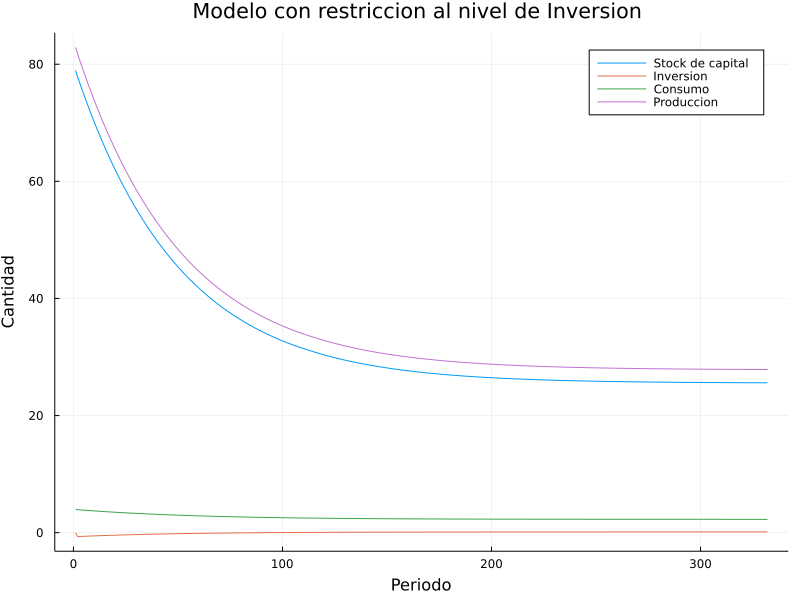

In [9]:
Time = 332
K_0 = 80
y_path1 = ones(Time)
c_path1 = ones(Time)
K_path1 = ones(Time)
I_path1 = ones(Time)
y_path1[1] = f(K_0)
K_path1[1] = g_1(K_0)
I_path1[1] = 0
c_path1[1] = y_path1[1] - K_path1[1]
for t in 2:(Time)
    K_path1[t] = g_1( K_path1[t-1] )
    y_path1[t] = f(K_path1[t-1])
    c_path1[t] = y_path1[t] - K_path1[t]
    I_path1[t] = K_path1[t] - K_path1[t-1]*(1-𝛿)
end





graph1= plot(1:Time,K_path1,label="Stock de capital",title="Modelo con restriccion al nivel de Inversion ",xlabel="Periodo",ylabel="Cantidad")
plot!(1:Time,I_path1,label="Inversion ",size = (800,600) )
plot!(1:Time,c_path1,label="Consumo" )
plot!(1:Time,y_path1,label="Produccion ")








In [10]:
#### Con este comando podemos guardar el gráfico para usarlo en presentaciones

savefig(graph1,"Restriccion.png")

#### Grafico del consumo para un $K_0$ = 80 , y sin restriccion de inversión


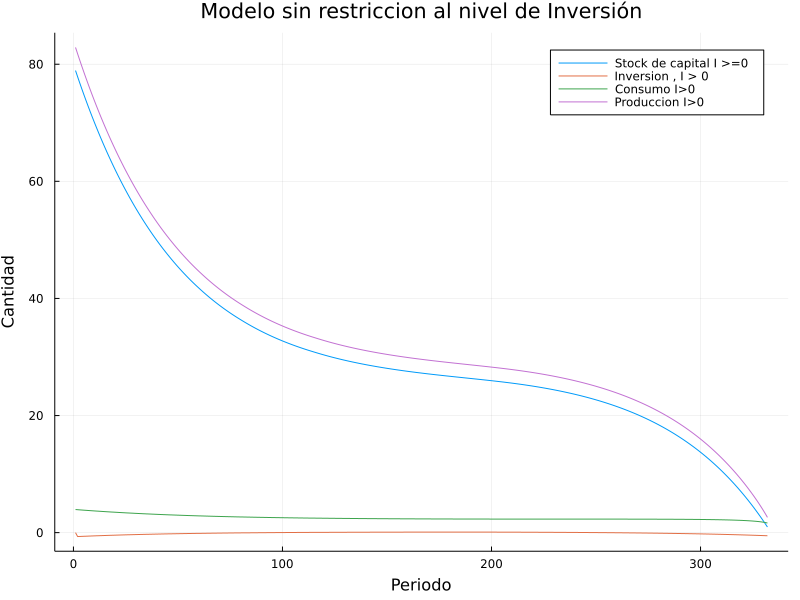

In [11]:
Time = 332
K_0 = 80
y_path2 = ones(Time)
c_path2 = ones(Time)
K_path2 = ones(Time)
I_path2 = ones(Time)
y_path2[1] = f(K_0)
K_path2[1] = g_2(K_0)
I_path2[1] = 0
c_path2[1] = y_path2[1] - K_path2[1]
for t in 2:(Time)
    K_path2[t] = g_2( K_path2[t-1] )
    y_path2[t] = f(K_path2[t-1])
    c_path2[t] = y_path2[t] - K_path2[t]
    I_path2[t] = K_path2[t] - K_path2[t-1]*(1-𝛿)
end





graph2 =plot(1:Time,K_path2,label="Stock de capital I >=0",title="Modelo sin restriccion al nivel de Inversión",xlabel="Periodo",ylabel="Cantidad")
plot!(graph2,1:Time,I_path2,label="Inversion , I > 0",size = (800,600) )
plot!(graph2,1:Time,c_path2,label="Consumo I>0" )
plot!(graph2,1:Time,y_path2,label="Produccion I>0")

In [12]:
#### Con este comando podemos guardar el gráfico para usarlo en presentaciones

savefig(graph2,"Sin-Restriccion.png")

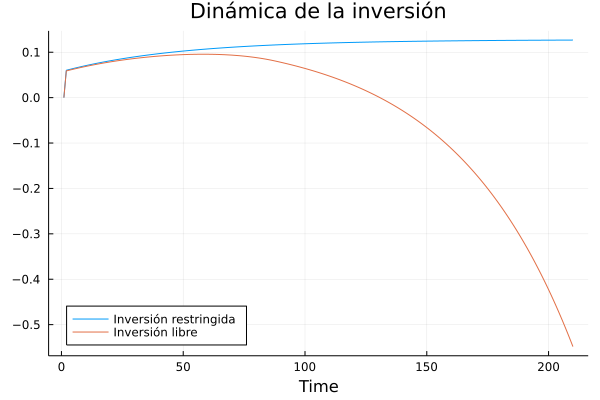

In [13]:
Time=210
K_0  = 30

y_path3 = ones(Time)
c_path3 = ones(Time)
K_path3 = ones(Time)
I_path3= ones(Time)
I_path3[1] = 0

y_path3[1] = f(K_0)
K_path3[1] = g_1(K_0)
c_path3[1] = y_path3[1] - K_path3[1]
for t in 2:(Time)  
    K_path3[t] = g_1( K_path3[t-1] )
    y_path3[t] = f(K_path3[t-1])
    c_path3[t] = y_path3[t] - K_path3[t]
    I_path3[t] = K_path3[t] - K_path3[t-1]*(1-𝛿)
end


y_path4 = ones(Time)
c_path4 = ones(Time)
K_path4 = ones(Time)
I_path4= ones(Time)
I_path4[1] = 0

y_path4[1] = f(K_0)
K_path4[1] = g_2(K_0)
c_path4[1] = y_path4[1] - K_path4[1]
for t in 2:(Time)  
    K_path4[t] = g_2( K_path4[t-1] )
    y_path4[t] = f(K_path4[t-1])
    c_path4[t] = y_path4[t] - K_path4[t]
    I_path4[t] = K_path4[t] - K_path4[t-1]*(1-𝛿)
end






graph3 =plot(1:Time,I_path3,label="Inversión restringida",title="Dinámica de la inversión",xlabel="Time")
plot!(graph3,1:Time,I_path4,label="Inversión libre",legend=:bottomleft)



In [14]:
savefig(graph3,"Inversion.png")

________________________________________________________________________________________________________________________

#### Adicional, experimental con policy $I_t = 0\, \forall t$

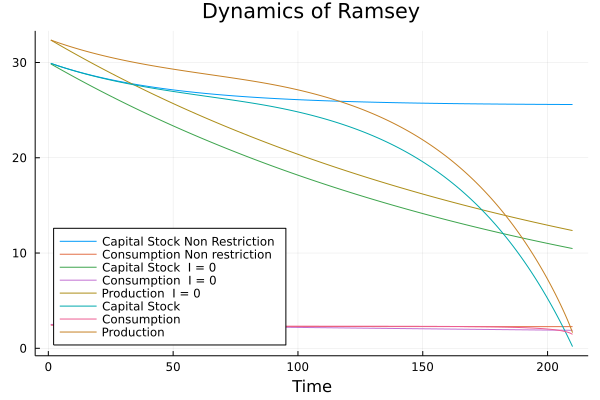

In [15]:
Time = 210
K_0 = 30



y_path = ones(Time)
c_path = ones(Time)
K_path = ones(Time)
I_path= ones(Time)
I_path[1] = 0

y_path[1] = f(K_0)
K_path[1] = g_1(K_0)
c_path[1] = y_path[1] - K_path[1]
for t in 2:(Time)  
    K_path[t] = g_1( K_path[t-1] )
    y_path[t] = f(K_path[t-1])
    c_path[t] = y_path[t] - K_path[t]
    I_path[t] = K_path[t] - K_path[t-1]*(1-𝛿)
end

plot(1:Time,K_path,label="Capital Stock Non Restriction",title="Dynamics of Ramsey",xlabel="Time",legend=:bottomleft)
plot!(1:Time,c_path,label="Consumption Non restriction")
#plot!(1:Time,y_path,label="Production Non restriction")



y_path1 = ones(Time)
c_path1 = ones(Time)
K_path1 = ones(Time)
I_path1 = ones(Time)
y_path1[1] = f(K_0)
K_path1[1] = g_1(K_0)
I_path1[1] = 0
c_path1[1] = y_path1[1] - K_path1[1]
for t in 2:(Time)
    K_path1[t] = g_2( K_path1[t-1] )
    y_path1[t] = f(K_path1[t-1])
    c_path1[t] = y_path1[t] - K_path1[t]
    I_path1[t] = K_path1[t] - K_path1[t-1]*(1-𝛿)
end

y_path2 = ones(Time)
c_path2 = ones(Time)
K_path2 = ones(Time)
I_path2 = ones(Time)
y_path2[1] = f(K_0)
K_path2[1] = (1-𝛿)*(K_0)
I_path2[1] = 0
c_path2[1] = y_path2[1] - K_path2[1]
for t in 2:(Time)
    K_path2[t] = (1-𝛿)*K_path2[t-1]
    y_path2[t] = f(K_path2[t-1])
    c_path2[t] = y_path2[t] - K_path2[t]
    I_path2[t] = K_path2[t] - K_path2[t-1]*(1-𝛿)
end


plot!(1:Time,K_path2,label="Capital Stock  I = 0")
plot!(1:Time,c_path2,label="Consumption  I = 0" )
plot!(1:Time,y_path2,label="Production  I = 0 ")



plot!(1:Time,K_path1,label="Capital Stock ")
plot!(1:Time,c_path1,label="Consumption " )
plot!(1:Time,y_path1,label="Production ")